In [1]:
pip install termcolor

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install better_profanity

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
from termcolor import colored as cd
from pprint import pprint
from textblob import TextBlob
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, TweetTokenizer
#nltk.download('punkt')
import string
from better_profanity import profanity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import cross_val_score
from sklearn.metrics.pairwise import cosine_similarity
import string
from scipy.stats import linregress
import scipy.stats as st
# # Import API key
# try:
#   from config import gkey
# except:
#   from api_keys import g_key 
#   gkey = g_key   

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rashm\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [6]:
# Get SouthPark data  
SP_Diag = pd.DataFrame(pd.read_csv("../resources/All-seasons.csv")) 
SP_Diag.head(5)

,Season,Episode,Character,Line
0,10,1,Stan,"You guys, you guys! Chef is going away. \n"
1,10,1,Kyle,Going away? For how long?\n
2,10,1,Stan,Forever.\n
3,10,1,Chef,I'm sorry boys.\n
4,10,1,Stan,"Chef said he's been bored, so he joining a gro..."


In [7]:
# Add data series to hold word Count 
SP_Diag["Word Count"] = np.nan
SP_Diag.head(5)

,Season,Episode,Character,Line,Word Count
0,10,1,Stan,"You guys, you guys! Chef is going away. \n",NaN
1,10,1,Kyle,Going away? For how long?\n,NaN
2,10,1,Stan,Forever.\n,NaN
3,10,1,Chef,I'm sorry boys.\n,NaN
4,10,1,Stan,"Chef said he's been bored, so he joining a gro...",NaN


In [8]:
# Get word count 
WordListAll = []

for i, row in SP_Diag.iterrows():
    SP_Diag['Word Count'][i] = len(SP_Diag['Line'][i].split())
    wl = SP_Diag['Line'][i].split()
    WordListAll.extend(wl)

SP_Diag.head(5)   

C:\Users\rashm\AppData\Local\Temp/ipykernel_27112/1385685091.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SP_Diag['Word Count'][i] = len(SP_Diag['Line'][i].split())


,Season,Episode,Character,Line,Word Count
0,10,1,Stan,"You guys, you guys! Chef is going away. \n",8.0
1,10,1,Kyle,Going away? For how long?\n,5.0
2,10,1,Stan,Forever.\n,1.0
3,10,1,Chef,I'm sorry boys.\n,3.0
4,10,1,Stan,"Chef said he's been bored, so he joining a gro...",15.0


In [9]:
# Get word count 
# Initialize lists to hold words
WordListAll = []
WordListFiltered =[]

# Get lists from NLTK library
StopWords = set(stopwords.words('english'))
pun = set(string.punctuation)   # !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~

# Set tokenizer of choice 
tknzr = TweetTokenizer(preserve_case=False)


# Loop through South Park DF set raw word count
for i, row in SP_Diag.iterrows():
    SP_Diag['Word Count'][i] = len(SP_Diag['Line'][i].split())
    new_line = SP_Diag['Line'][i].replace("'", "") # clear apostrophes
    #wl = SP_Diag['Line'][i].split()  # Split with apostrophes
    wl = new_line.split()
    WordListAll.extend(wl) # Add to word list
    # words = word_tokenize(SP_Diag['Line'][i])  # selected a tokenizer that worked better
    words = tknzr.tokenize(SP_Diag['Line'][i])
    # For each tokenized word check to see if it is punctuation or stop word
    for word in words:
        if word not in pun:
            if word.lower() not in StopWords:
                WordListFiltered.append(word)
        else:    
             WordListAll.append(word)

SP_Diag.head(5)   

C:\Users\rashm\AppData\Local\Temp/ipykernel_27112/364145106.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SP_Diag['Word Count'][i] = len(SP_Diag['Line'][i].split())


,Season,Episode,Character,Line,Word Count
0,10,1,Stan,"You guys, you guys! Chef is going away. \n",8.0
1,10,1,Kyle,Going away? For how long?\n,5.0
2,10,1,Stan,Forever.\n,1.0
3,10,1,Chef,I'm sorry boys.\n,3.0
4,10,1,Stan,"Chef said he's been bored, so he joining a gro...",15.0


In [10]:
# Reuse NLTK library with MIT list of offensive words file needs proper credit 
Curse_words = set(stopwords.words("bad-words.txt"))

# Initialize variable to hold list of bad words
WordListBad = []

# Add series to hold number of bad words
SP_Diag["Offensive Word Count"] = np.nan

for i, row in SP_Diag.iterrows():
    bad_word_count = 0
    words = tknzr.tokenize(SP_Diag['Line'][i]) 
    for word in words:
        if word.lower() in Curse_words:
            bad_word_count += 1
            WordListBad.append(word)
            SP_Diag['Offensive Word Count'][i] = bad_word_count
            #print(f'found a bad word on line {i}, {word} {bad_word_count}. ')

C:\Users\rashm\AppData\Local\Temp/ipykernel_27112/3316979342.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SP_Diag['Offensive Word Count'][i] = bad_word_count


In [11]:
# Save new .csv file 
SP_Diag.head(50)
SP_Diag.to_csv('../resources/SouthParkSentBad.csv') 

In [12]:
# Making my lists -- checking them twice gonna find out who's naughty or nice
for x in range(10):
    print(WordListAll[x])
print("-----------------------")
for x in range(10):
    print(WordListFiltered[x])
print("-----------------------")
for x in range(10):
    print(WordListBad[x])

You
guys,
you
guys!
Chef
is
going
away.
,
!
-----------------------
guys
guys
chef
going
away
going
away
long
forever
i'm
-----------------------
fatass
jew
randy
sex
sexual
balls
rectum
asshole
goddammit
sodomize


In [13]:
# Add sentiment values to DF
SP_Diag["Polarity"] = np.nan
SP_Diag["Subjectivity"] = np.nan

for i, row in SP_Diag.iterrows():
    blob = TextBlob(row['Line'])
    BlobSent = blob.sentiment
    SP_Diag.loc[i, 'Polarity'] = BlobSent[0]
    SP_Diag.loc[i, 'Subjectivity'] = BlobSent[1]

In [14]:
SP_Diag.head(5)

,Season,Episode,Character,Line,Word Count,Offensive Word Count,Polarity,Subjectivity
0,10,1,Stan,"You guys, you guys! Chef is going away. \n",8.0,NaN,0.000000,0.000000
1,10,1,Kyle,Going away? For how long?\n,5.0,NaN,-0.050000,0.400000
2,10,1,Stan,Forever.\n,1.0,NaN,0.000000,0.000000
3,10,1,Chef,I'm sorry boys.\n,3.0,NaN,-0.500000,1.000000
4,10,1,Stan,"Chef said he's been bored, so he joining a gro...",15.0,NaN,-0.083333,0.833333


In [15]:
# Count all the words 
c = Counter(WordListAll)
wordlist= []
occurancelist = []

# Get most common words
most_common_words = c.most_common(25)

# Build lists to plot 
for x in range(len(most_common_words)-1):
    mcwlist = most_common_words[x]
    word = mcwlist[0]
    occurance = mcwlist[1]
    wordlist.append(word)
    occurancelist.append(occurance)
    
# Build DF
Word_Frequency = pd.DataFrame(columns = ['Word', 'Frequency'])
Word_Frequency['Word'] = wordlist
Word_Frequency['Frequency'] = occurancelist
Word_Frequency.head(5)   

,Word,Frequency
0,.,64571
1,",",62893
2,!,43508
3,?,24138
4,the,22526


In [16]:
# text = WordListAll
# wordcloud = wordcloud().generate(text)

In [17]:
Word_Frequency.set_index('Word', inplace=True)
Word_Frequency.head(5)

,Frequency
Word,
.,64571
",",62893
!,43508
?,24138
the,22526


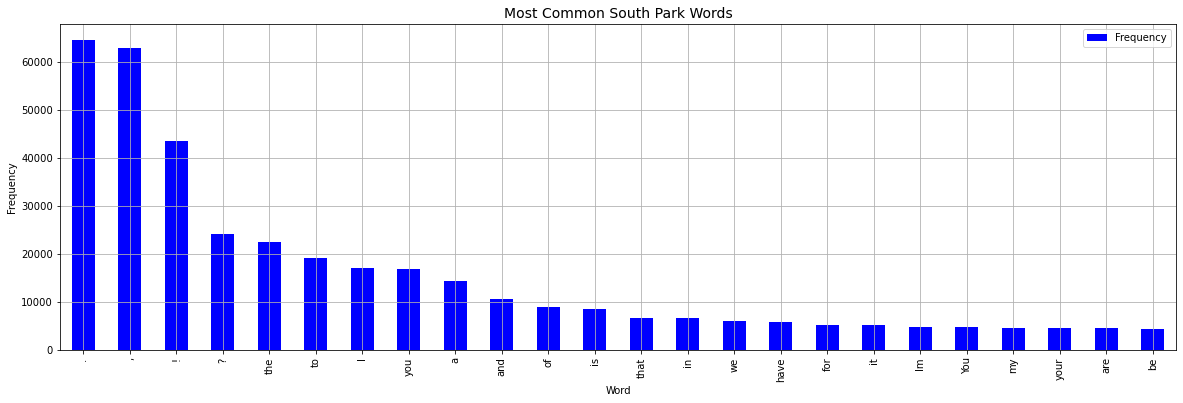

In [18]:
# Plot most common words

Word_Frequency.plot(xlabel="Word", ylabel="Frequency", kind="bar", figsize=(20,6), color='blue')
plt.title(f"Most Common South Park Words", fontsize=14)
plt.grid()
plt.show()

In [19]:
# Count all the filtered words 
c = Counter(WordListFiltered)
wordlist= []
occurancelist = []

# Get most common words
most_common_words = c.most_common(25)

# Build lists to plot 
for x in range(len(most_common_words)-1):
    mcwlist = most_common_words[x]
    word = mcwlist[0]
    occurance = mcwlist[1]
    wordlist.append(word)
    occurancelist.append(occurance)
    
# Build DF
Word_Frequency = pd.DataFrame(columns = ['Word', 'Frequency'])
Word_Frequency['Word'] = wordlist
Word_Frequency['Frequency'] = occurancelist
Word_Frequency.head(25)   

,Word,Frequency
0,...,6509
1,oh,5631
2,i'm,4976
3,get,3996
4,yeah,3675
5,well,3544
6,know,3466
7,right,3439
8,like,3233
9,go,3182


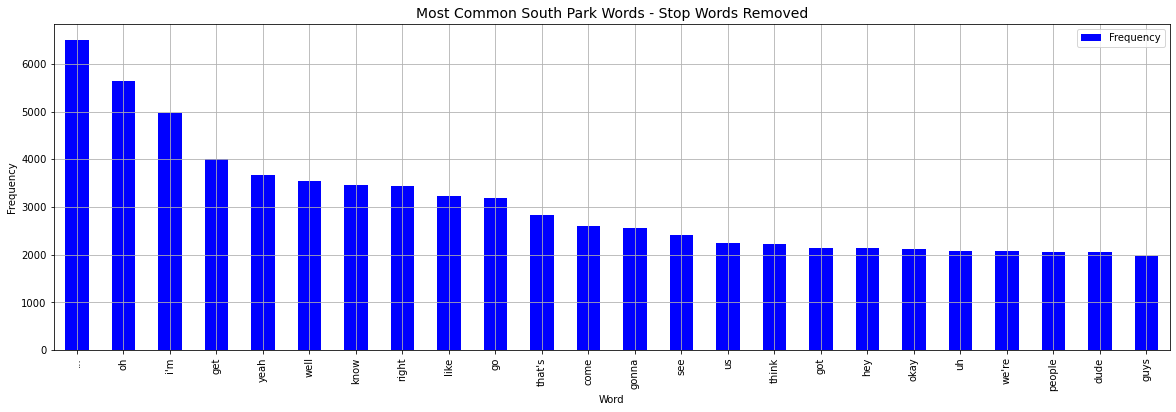

In [20]:
# Plot most common filtered words
Word_Frequency.set_index('Word', inplace=True)
Word_Frequency.plot(xlabel="Word", ylabel="Frequency", kind="bar", figsize=(20,6), color='blue')
plt.title(f"Most Common South Park Words - Stop Words Removed", fontsize=14)
plt.grid()
plt.show()

In [21]:
# Count all the bad words 
c = Counter(WordListBad)
wordlist= []
occurancelist = []

# Get most common words
most_common_words = c.most_common(25)

# Build lists to plot 
for x in range(len(most_common_words)-1):
    mcwlist = most_common_words[x]
    word = mcwlist[0]
    occurance = mcwlist[1]
    wordlist.append(word)
    occurancelist.append(occurance)
    
# Build DF
Word_Frequency = pd.DataFrame(columns = ['Word', 'Frequency'])
Word_Frequency['Word'] = wordlist
Word_Frequency['Frequency'] = occurancelist
Word_Frequency.head(25)   

,Word,Frequency
0,god,1598
1,hell,973
2,jesus,756
3,stupid,667
4,kid,579
5,ass,536
6,kill,479
7,fuck,454
8,shit,404
9,gay,393


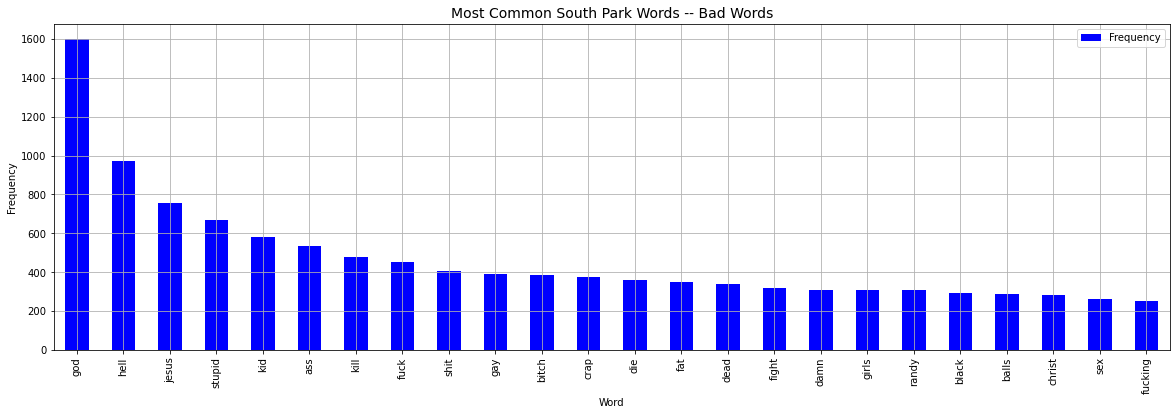

In [22]:
# Plot most common words bad words 
Word_Frequency.set_index('Word', inplace=True)
Word_Frequency.plot(xlabel="Word", ylabel="Frequency", kind="bar", figsize=(20,6), color='blue')
plt.title(f"Most Common South Park Words -- Bad Words", fontsize=14)
plt.grid()
plt.show()

### Note: the first word on the bad list - may not be a bad word depending on usage it would take a great deal of additional work to evaluate that word in context.  We may be able to compare it with sentiment scores (of course their reliability is also not a certainty.

groupby & statistics table of mean, median, variance, standard deviation, and SEM,correlation coefficient and linear regression:

In [23]:
#fill nan with 0
#grouped by season:
#SP_Diag['Season'] = pd.to_numeric(SP_Diag['Season'], errors='coerce')
#SP_Diag_Cleaned_NA = SP_Diag.fillna(0)
#SP_Diag_Cleaned_NA['Season'] = SP_Diag_Cleaned_NA['Season'].astype(int)
#groupby_season = SP_Diag_Cleaned_NA.groupby("Season")["Offensive Word Count"].sum()
#pd.DataFrame(groupby_season)
#groupby_season.to_frame()
#groupby_season.columns
#groupby_season.sort_values('1')
#groupby_season


In [24]:
SP_Diag_Cleaned_NA = SP_Diag.fillna(0)
groupby_season = SP_Diag_Cleaned_NA.groupby("Season")["Offensive Word Count"].sum().reset_index()
groupby_season=groupby_season[:-1].astype(float)
#groupby_season.sort_values(by=['Season']).reset_index(drop=True)
groupby_season = groupby_season.sort_values(by=['Season']).reset_index(drop=True)
groupby_season.head(5)


,Season,Offensive Word Count
0,1.0,1383.0
1,2.0,1590.0
2,3.0,1645.0
3,4.0,1546.0
4,5.0,1322.0


In [25]:
#groupby character:
groupby_character =SP_Diag_Cleaned_NA.groupby("Character")["Offensive Word Count"].sum().reset_index()
groupby_character.count().head(10)
pd.DataFrame(groupby_character)


,Character,Offensive Word Count
0,A Banana,0.0
1,A Bishop,0.0
2,A Boy,0.0
3,A British Person,1.0
4,A British person,1.0
...,...,...
3945,Zipliner,0.0
3946,Zombie,0.0
3947,Zombie Mortician,0.0
3948,Zytar,1.0


In [26]:
new_groupby = SP_Diag_Cleaned_NA.groupby("Season")["Character"].sum().reset_index()

new_groupby.count().head(10)

Season       19
Character    19
dtype: int64

In [27]:
# Generate a  statistics table of mean, median, variance, standard deviation, and SEM
# Use groupby and summary statistical methods to calculate the offensive word per season
# mean, median, variance, standard deviation, and SEM of the offensive words
# Assemble the resulting series into a single summary dataframe.

mean_by_season = SP_Diag_Cleaned_NA['Offensive Word Count'].groupby(SP_Diag_Cleaned_NA['Season']).mean()
median_by_season = SP_Diag_Cleaned_NA['Offensive Word Count'].groupby(SP_Diag_Cleaned_NA['Season']).median()
var_by_season = SP_Diag_Cleaned_NA['Offensive Word Count'].groupby(SP_Diag_Cleaned_NA['Season']).var()
std_by_season = SP_Diag_Cleaned_NA['Offensive Word Count'].groupby(SP_Diag_Cleaned_NA['Season']).std()
sem_by_season = SP_Diag_Cleaned_NA['Offensive Word Count'].groupby(SP_Diag_Cleaned_NA['Season']).sem()

summary_stat_by_season = pd.DataFrame({"Average Offensive Word Count":mean_by_season, 
                            "Median Offensive Word Count":median_by_season, 
                           "Offensive Word Count Variance":var_by_season, 
                           "Offensive Word Count Std. Dev.":std_by_season, 
                           "Offensive Word Count Std. Err.":sem_by_season})
# Display the Summary statistics table grouped by 'Offensive language' column
summary_stat_by_season

,Average Offensive Word Count,Median Offensive Word Count,Offensive Word Count Variance,Offensive Word Count Std. Dev.,Offensive Word Count Std. Err.
Season,,,,,
1,0.331655,0.0,0.586789,0.766021,0.011862
10,0.274561,0.0,0.489148,0.699391,0.011871
11,0.334675,0.0,0.514938,0.717592,0.012168
12,0.321137,0.0,0.627027,0.791851,0.013770
13,0.403439,0.0,0.823059,0.907226,0.015897
14,0.378661,0.0,0.707694,0.841246,0.014543
15,0.375040,0.0,0.669299,0.818107,0.014691
16,0.341346,0.0,0.566036,0.752354,0.013469
17,0.346204,0.0,0.696063,0.834304,0.017378


In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM
#Using groupby and summary statistical methods  
# mean, median, variance, standard deviation, and SEM. 
# Assemble the resulting series into a single summary dataframe.

mean_by_character = SP_Diag['Offensive Word Count'].groupby(SP_Diag['Character']).mean()
median_by_character = SP_Diag['Offensive Word Count'].groupby(SP_Diag['Character']).median()
var_by_character = SP_Diag['Offensive Word Count'].groupby(SP_Diag['Character']).var()
std_by_character = SP_Diag['Offensive Word Count'].groupby(SP_Diag['Character']).std()
sem_by_character = SP_Diag['Offensive Word Count'].groupby(SP_Diag['Character']).sem()

summary_stat_by_character = pd.DataFrame({"Average Offensive Word Count":mean_by_character, 
                            "Median Offensive Word Count":median_by_character, 
                           "Offensive Word Count Variance":var_by_character, 
                           "Offensive Word Count Std. Dev.":std_by_character, 
                           "Offensive Word Count Std. Err.":sem_by_character})
# Display the Summary statistics table grouped by 'Offensive language' column
summary_stat_by_character

,Average Offensive Word Count,Median Offensive Word Count,Offensive Word Count Variance,Offensive Word Count Std. Dev.,Offensive Word Count Std. Err.
Character,,,,,
A Banana,NaN,NaN,NaN,NaN,NaN
A Bishop,NaN,NaN,NaN,NaN,NaN
A Boy,NaN,NaN,NaN,NaN,NaN
A British Person,1.0,1.0,NaN,NaN,NaN
A British person,1.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...
Zipliner,NaN,NaN,NaN,NaN,NaN
Zombie,NaN,NaN,NaN,NaN,NaN
Zombie Mortician,NaN,NaN,NaN,NaN,NaN


In [29]:
SP_Diag_Cleaned_NA

,Season,Episode,Character,Line,Word Count,Offensive Word Count,Polarity,Subjectivity
0,10,1,Stan,"You guys, you guys! Chef is going away. \n",8.0,0.0,0.000000,0.000000
1,10,1,Kyle,Going away? For how long?\n,5.0,0.0,-0.050000,0.400000
2,10,1,Stan,Forever.\n,1.0,0.0,0.000000,0.000000
3,10,1,Chef,I'm sorry boys.\n,3.0,0.0,-0.500000,1.000000
4,10,1,Stan,"Chef said he's been bored, so he joining a gro...",15.0,0.0,-0.083333,0.833333
...,...,...,...,...,...,...,...,...
70891,9,14,Stan,I think you're pushing it.\n,5.0,0.0,0.000000,0.000000
70892,9,14,Randy,How about twenty?\n,3.0,0.0,0.000000,0.000000
70893,9,14,Stan,That's not disciprine.\n,3.0,0.0,0.000000,0.000000
70894,9,14,Randy,Right right. Does vodka count?\n,5.0,0.0,0.285714,0.535714


Text(0, 0.5, 'Offensive Word Count')

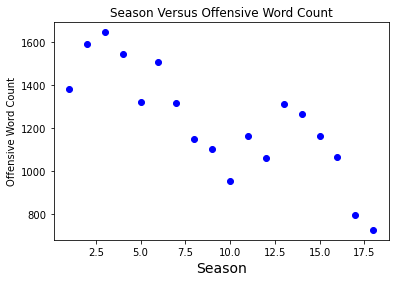

In [30]:
# Generate a scatter plot of average Season vs 'Offensive Word Count'
fig1, ax1 = plt.subplots()
avg_SP_Diag = groupby_season.groupby(["Season"]).mean()
avg_SP_Diag
marker_size=15
plt.scatter(groupby_season['Season'],groupby_season['Offensive Word Count'], color="blue")
plt.title('Season Versus Offensive Word Count')
plt.xlabel('Season',fontsize =14)
plt.ylabel('Offensive Word Count')

In [31]:
SP_Diag_Cleaned_NA = SP_Diag.fillna(0)
groupby_season = SP_Diag_Cleaned_NA.groupby("Season")["Polarity"].sum().reset_index()
groupby_season=groupby_season[:-1].astype(float)
#groupby_season.sort_values(by=['Season']).reset_index(drop=True)
groupby_season = groupby_season.sort_values(by=['Season']).reset_index(drop=True)
groupby_season.head(5)


,Season,Polarity
0,1.0,130.472872
1,2.0,273.231473
2,3.0,328.656423
3,4.0,258.908482
4,5.0,239.690323


Text(0, 0.5, 'Polarity')

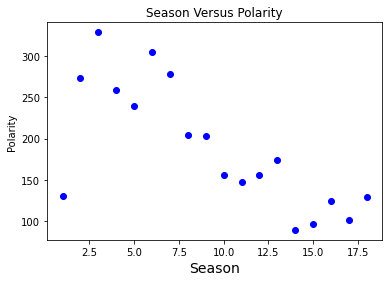

In [32]:
# Generate a scatter plot of average Season vs 'Polarity'
fig2, ax2 = plt.subplots()
avg_SP_Diag2 = groupby_season.groupby(["Season"]).mean()
avg_SP_Diag2
marker_size=15
plt.scatter(groupby_season['Season'],groupby_season['Polarity'], color="blue")
plt.title('Season Versus Polarity')
plt.xlabel('Season',fontsize =14)
plt.ylabel('Polarity')

In [33]:
SP_Diag_Cleaned_NA = SP_Diag.fillna(0)
groupby_season = SP_Diag_Cleaned_NA.groupby("Season")["Subjectivity"].sum().reset_index()
groupby_season=groupby_season[:-1].astype(float)
#groupby_season.sort_values(by=['Season']).reset_index(drop=True)
groupby_season = groupby_season.sort_values(by=['Season']).reset_index(drop=True)
groupby_season.head(5)


,Season,Subjectivity
0,1.0,1054.522856
1,2.0,1580.421808
2,3.0,1353.175515
3,4.0,1322.529390
4,5.0,1180.238982


Text(0, 0.5, 'Subjectivity')

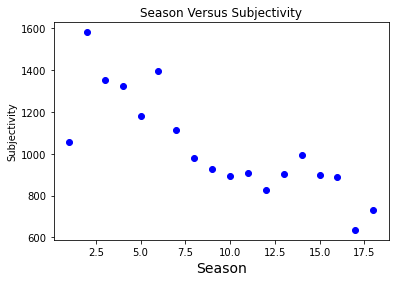

In [34]:
# Generate a scatter plot of average Season vs Subjectivity
fig3, ax3 = plt.subplots()
avg_SP_Diag3 = groupby_season.groupby(["Season"]).mean()
avg_SP_Diag3
marker_size=15
plt.scatter(groupby_season['Season'],groupby_season['Subjectivity'], color="blue")
plt.title('Season Versus Subjectivity')
plt.xlabel('Season',fontsize =14)
plt.ylabel('Subjectivity')

In [35]:
# Calculate the correlation coefficient and linear regression model 

correlation = st.pearsonr(SP_Diag_Cleaned_NA['Word Count'],SP_Diag_Cleaned_NA['Offensive Word Count'])
print(f"The correlation between Word Count and Offensive Word Count is {round(correlation[0],2)}")

The correlation between Word Count and Offensive Word Count is 0.39


The r-squared is: 0.155


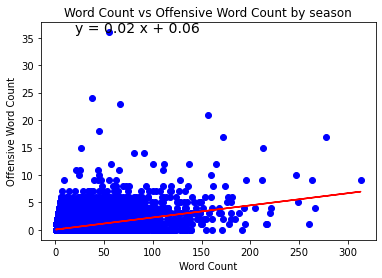

In [39]:
# Add the linear regression equation and line to plot

(slope, intercept,rvalue, pvalue, stderr)= linregress(SP_Diag_Cleaned_NA['Word Count'],SP_Diag_Cleaned_NA['Offensive Word Count'])
regress_values=SP_Diag_Cleaned_NA['Word Count']* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(SP_Diag_Cleaned_NA['Word Count'],SP_Diag_Cleaned_NA['Offensive Word Count'],color='b')
plt.plot(SP_Diag_Cleaned_NA['Word Count'], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Word Count")
plt.ylabel("Offensive Word Count")
plt.title("Word Count vs Offensive Word Count by season")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()